In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

In [5]:
data=pd.read_csv('/content/Copper_Set.xlsx - Result 1.csv')

In [6]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938,25,Won,W,41,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963,30,Won,WI,28,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25239,C704DEB7-EFF0-4BFF-89B9-001E2A8CA5A0,20210304,7.760847,30200854,25,Won,W,41,2.00,1345.0,0000000000000000000000000000000001006130,1.641416e+08,20210401.0,930.00
25240,62EEBC98-E41F-4199-9727-81573B46D63A,20210304,40.193434,30200964,25,Not lost for AM,W,41,0.45,1420.0,S01X.0588,6.119930e+05,20210401.0,1536.02
25241,63D7C9C3-6001-4D71-A8CC-8E14ADE68E09,20210304,6.741159,30200854,25,Won,W,41,0.71,1240.0,0000000000000000000000000000000001003637,6.119930e+05,20210401.0,1154.00
25242,2552022D-CAD4-4461-946A-354BF701364F,20210304,39.092828,30200964,25,Not lost for AM,W,41,0.45,1420.0,S01X.0570,6.119930e+05,20210401.0,1473.97


In [7]:
data_1=data.copy()
data_1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938,25,Won,W,41,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963,30,Won,WI,28,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


In [8]:
data_1.shape

(25244, 14)

In [9]:
data_1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [10]:
data_1.drop(columns = ['id'],inplace=True)

In [11]:
data_1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401,54.151139,30156308,28,Won,W,10,2.0,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.0


In [12]:
data_1.isnull().sum()

item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     11206
product_ref          1
delivery date        1
selling_price        1
dtype: int64

In [13]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(data_1.isna().mean()*100).T

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.390746,0.003961,0.003961,0.003961


In [14]:
#data_2=data_1.drop(columns=['material_ref'],inplace=True)
# material_ref has large set of null values, so replacing them with unknown
data_1['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
#data_1 = data_1.dropna()

In [15]:
data_1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401,54.151139,30156308,28,Won,W,10,2.0,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.0


In [16]:
data_1.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      1
delivery date    1
selling_price    1
dtype: int64

In [17]:
# filling the missing values using statistical techniques
data_1 = data_1.fillna({'item_date': st.mode(data_1['item_date']),
                'delivery date': st.mode(data_1['delivery date']),
                'customer': data_1['customer'].mean(),
                'country': data_1['country'].mean(),
                'application': data_1['application'].mean(),
                'selling_price': data_1['selling_price'].mean(),
                'thickness': data_1['thickness'].median()})

In [18]:
data_1['status'].fillna(data_1['status'].mode()[0], inplace = True)

In [19]:
data_1.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      1
delivery date    0
selling_price    0
dtype: int64

In [20]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25244 entries, 0 to 25243
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_date      25244 non-null  int64  
 1   quantity tons  25244 non-null  float64
 2   customer       25244 non-null  int64  
 3   country        25244 non-null  int64  
 4   status         25244 non-null  object 
 5   item type      25244 non-null  object 
 6   application    25244 non-null  int64  
 7   thickness      25244 non-null  float64
 8   width          25244 non-null  float64
 9   material_ref   25244 non-null  object 
 10  product_ref    25243 non-null  float64
 11  delivery date  25244 non-null  float64
 12  selling_price  25244 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 2.5+ MB


In [21]:
#converting quantity value to numeric float type
#data_1['item_date'] = pd.to_datetime(data_1['item_date'])
#data_1['delivery date'] = pd.to_datetime(data_1['delivery date'])
#data_1['quantity tons'] = pd.to_numeric(data_1['quantity tons'], errors='coerce')

In [22]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
data_1['item_date'] = pd.to_datetime(data_1['item_date'], format='%Y%m%d', errors='coerce').dt.date
data_1['quantity tons'] = pd.to_numeric(data_1['quantity tons'], errors='coerce')
data_1['customer'] = pd.to_numeric(data_1['customer'], errors='coerce')
data_1['country'] = pd.to_numeric(data_1['country'], errors='coerce')
data_1['application'] = pd.to_numeric(data_1['application'], errors='coerce')
data_1['thickness'] = pd.to_numeric(data_1['thickness'], errors='coerce')
data_1['width'] = pd.to_numeric(data_1['width'], errors='coerce')
data_1['product_ref'] = pd.to_numeric(data_1['product_ref'], errors='coerce')
data_1['delivery date'] = pd.to_datetime(data_1['delivery date'], format='%Y%m%d', errors='coerce').dt.date
data_1['selling_price'] = pd.to_numeric(data_1['selling_price'], errors='coerce')

In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25244 entries, 0 to 25243
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_date      25243 non-null  object 
 1   quantity tons  25244 non-null  float64
 2   customer       25244 non-null  int64  
 3   country        25244 non-null  int64  
 4   status         25244 non-null  object 
 5   item type      25244 non-null  object 
 6   application    25244 non-null  int64  
 7   thickness      25244 non-null  float64
 8   width          25244 non-null  float64
 9   material_ref   25244 non-null  object 
 10  product_ref    25243 non-null  float64
 11  delivery date  25243 non-null  object 
 12  selling_price  25244 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.5+ MB


In [24]:
data_1['quantity tons'].value_counts()

54.151139     1
9.661871      1
28.150878     1
88.280704     1
8.521589      1
             ..
30.379922     1
48.578577     1
7.838787      1
15.619445     1
105.516779    1
Name: quantity tons, Length: 25244, dtype: int64

In [25]:
data_1['customer'].value_counts()

30202938    889
30153510    646
30156308    490
30161088    490
30205825    406
           ... 
30402585      1
30332041      1
30290964      1
30394097      1
30299929      1
Name: customer, Length: 723, dtype: int64

In [26]:
data_1['country'].value_counts()

25     4076
78     3597
27     3271
28     2864
32     2349
26     2309
77     1889
30     1687
84     1451
39      605
38      399
79      300
40      255
80      104
113      85
107       3
Name: country, dtype: int64

In [27]:
data_1['status'].value_counts()

Won                18525
Lost                3027
Not lost for AM     1674
Draft                698
Revised              652
To be approved       650
Offered               17
Wonderful              1
Name: status, dtype: int64

In [28]:
data_1['item type'].value_counts()

W         15895
S          8191
PL          908
Others      130
WI           99
IPL          21
Name: item type, dtype: int64

In [29]:
data_1['application'].value_counts()

10    11308
41     6551
15     2015
59     1632
42      767
27      451
56      450
29      369
40      250
25      212
26      179
66      166
28      161
22      119
20      106
79      105
38       84
3        80
65       69
4        56
69       26
67       24
5        16
70       12
39       10
19       10
2         8
99        7
58        1
Name: application, dtype: int64

In [30]:
data_1['thickness'].value_counts()

3.00    1916
2.00    1875
1.50    1580
4.00    1318
1.00    1184
        ... 
3.57       1
3.93       1
9.70       1
2.49       1
1.57       1
Name: thickness, Length: 396, dtype: int64

In [31]:
data_1['width'].value_counts()

1250.0    4838
1500.0    4760
1000.0    1493
2000.0     998
1220.0     767
          ... 
957.0        1
876.0        1
904.0        1
198.0        1
1556.0       1
Name: width, Length: 943, dtype: int64

In [32]:
data_1['product_ref'].value_counts()

6.119930e+05    5409
6.406650e+05    4572
1.641416e+08    3567
1.670799e+09    3215
1.668702e+09    2562
6.283770e+05    2415
6.404050e+05    1479
1.332077e+09     729
1.671864e+09     475
1.693868e+09     290
1.668701e+09     148
6.281170e+05      58
1.643372e+08      52
1.721130e+09      43
6.281120e+05      32
1.668702e+09      30
1.282008e+09      28
1.665572e+09      28
1.671876e+09      23
1.722208e+09      21
6.404000e+05      15
1.693868e+09      14
6.117330e+05      11
1.690738e+09       9
1.668702e+09       4
1.665572e+09       4
6.117280e+05       4
1.643364e+08       3
1.690738e+09       3
Name: product_ref, dtype: int64

In [33]:
data_1.drop_duplicates()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.000000
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.000000
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.330000
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.000000
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25239,2021-03-04,7.760847,30200854,25,Won,W,41,2.00,1345.0,0000000000000000000000000000000001006130,1.641416e+08,2021-04-01,930.000000
25240,2021-03-04,40.193434,30200964,25,Not lost for AM,W,41,0.45,1420.0,S01X.0588,6.119930e+05,2021-04-01,1536.020000
25241,2021-03-04,6.741159,30200854,25,Won,W,41,0.71,1240.0,0000000000000000000000000000000001003637,6.119930e+05,2021-04-01,1154.000000
25242,2021-03-04,39.092828,30200964,25,Not lost for AM,W,41,0.45,1420.0,S01X.0570,6.119930e+05,2021-04-01,1473.970000


In [34]:
data_1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,25244.000000,2.524400e+04,25244.000000,25244.000000,25244.000000,25244.000000,2.524300e+04,2.524400e+04
mean,102.322000,3.023984e+07,43.377714,25.777888,2.706862,1303.144458,5.186433e+08,4.945281e+03
std,462.739788,7.242012e+04,23.589208,17.757869,15.946183,251.501927,7.404604e+08,6.293913e+05
min,0.006311,3.014762e+07,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,12.179206,3.019753e+07,26.000000,10.000000,0.750000,1180.000000,6.283770e+05,8.840000e+02
50%,31.014060,3.020623e+07,30.000000,15.000000,1.630000,1250.000000,6.406650e+05,9.780000e+02
75%,67.612630,3.028838e+07,77.000000,41.000000,3.000000,1500.000000,1.668702e+09,1.098000e+03
max,20300.293590,3.040818e+07,113.000000,99.000000,2500.000000,2150.000000,1.722208e+09,1.000009e+08


In [35]:
q3 = data_1.application.quantile(0.75)
q1 = data_1.application.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(87.5, -36.5)

In [36]:
q3 = data_1.customer.quantile(0.75)
q1 = data_1.customer.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(30424649.0, 30061257.0)

In [37]:
q3 = data_1['quantity tons'].quantile(0.75)
q1 = data_1['quantity tons'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(150.76276519375, -70.97092889624999)

In [38]:

q3 = data_1['thickness'].quantile(0.75)
q1 = data_1['thickness'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres


(6.375, -2.625)

In [39]:

q3 = data_1['width'].quantile(0.75)
q1 = data_1['width'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres


(1980.0, 700.0)

In [40]:

q3 = data_1['product_ref'].quantile(0.75)
q1 = data_1['product_ref'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres


(4170811729.5, -2501481634.5)

In [41]:
data_1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0


In [42]:
df=data_1.copy()
df.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0


In [43]:
df_1=df.select_dtypes(["int64","float64"])

quantity tons
23.387518017188242


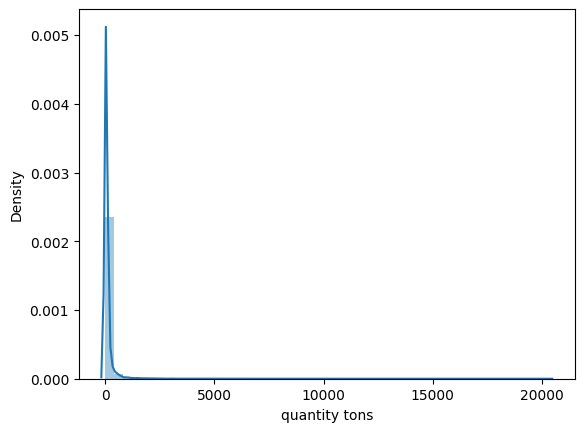

customer
0.6963425523128747


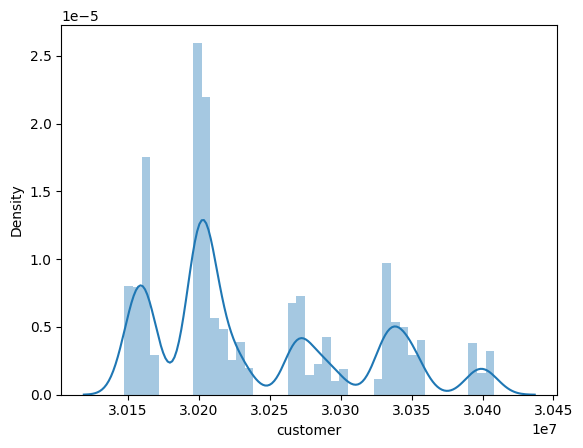

country
0.8953112347584964


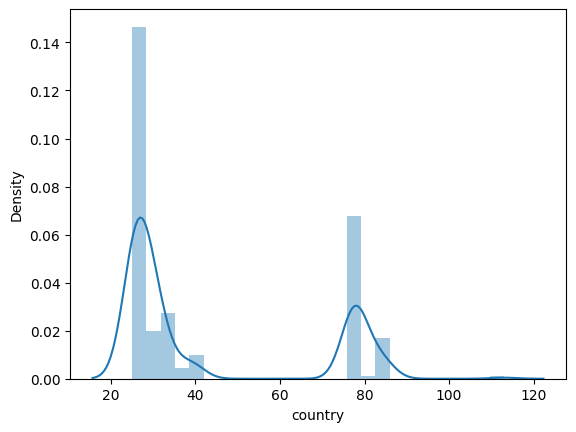

application
0.6310874250698781


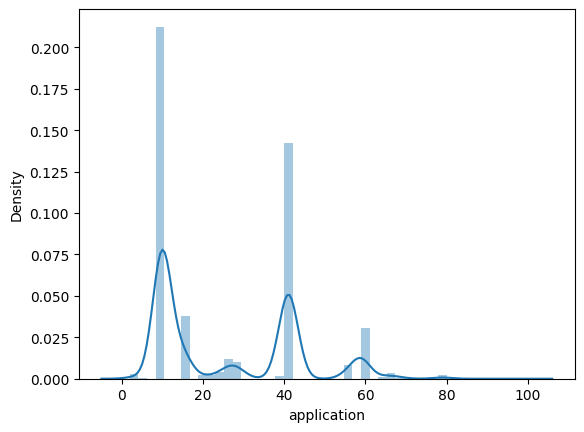

thickness
152.1721972785365


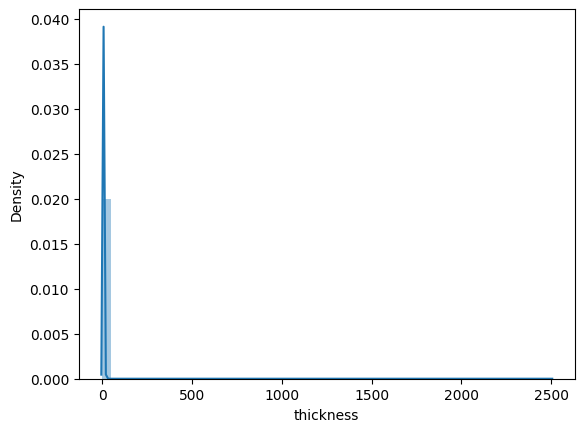

width
0.5578214687516437


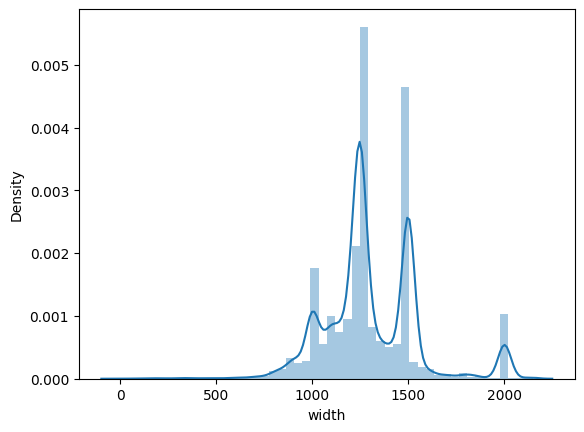

product_ref
nan


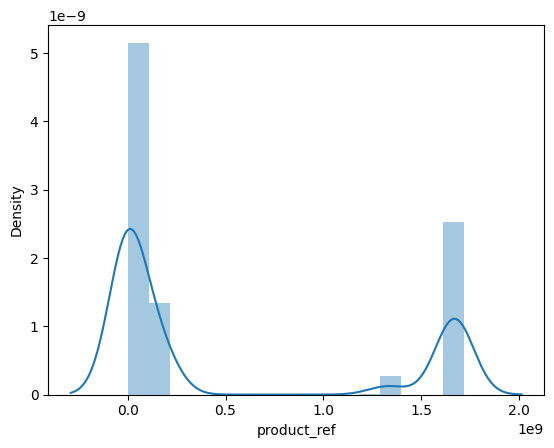

selling_price
158.87413214704338


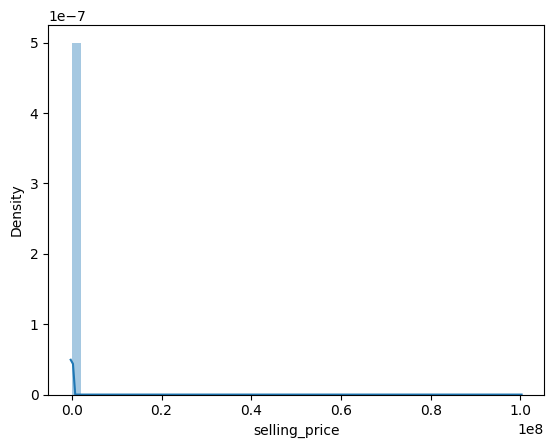

In [44]:
from scipy.stats import skew
for col in df_1:
  print(col)
  print(skew(df_1[col]))
  plt.figure()
  sns.distplot(df_1[col])
  plt.show()

In [45]:
import numpy as np
mask1 = df['selling_price'] <= 0
print(mask1.sum())
df.loc[mask1, 'selling_price'] = np.nan

mask1 = df['quantity tons'] <= 0
print(mask1.sum())
df.loc[mask1, 'quantity tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())

2
0
0


In [46]:
df.isnull().sum()

item_date        1
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      1
delivery date    1
selling_price    2
dtype: int64

In [47]:
df.dropna(inplace=True)

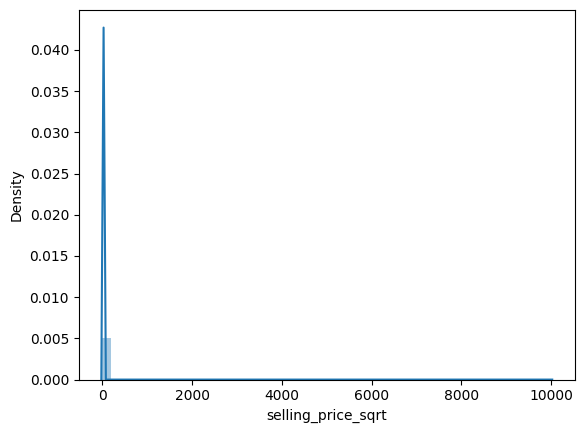

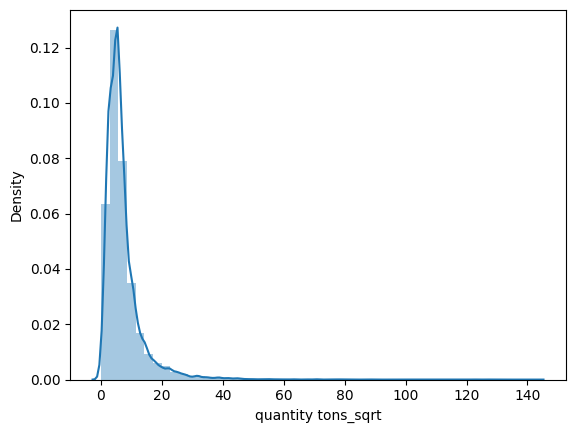

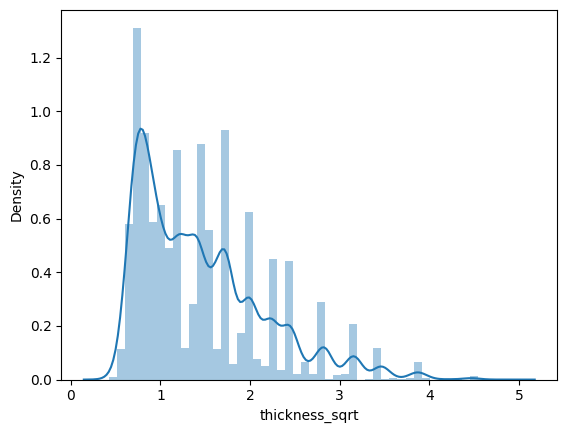

In [48]:
import numpy as np
df['selling_price_sqrt'] = np.sqrt(df['selling_price'])
sns.distplot(df['selling_price_sqrt'])
plt.show()

df['quantity tons_sqrt'] = np.sqrt(df['quantity tons'])
sns.distplot(df['quantity tons_sqrt'])
plt.show()

df['thickness_sqrt'] = np.sqrt(df['thickness'])
sns.distplot(df['thickness_sqrt'])
plt.show()

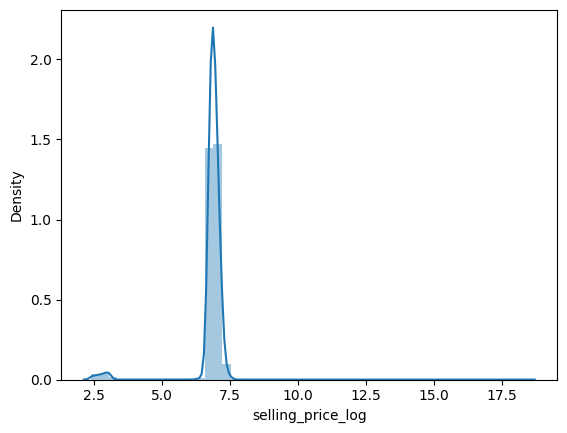

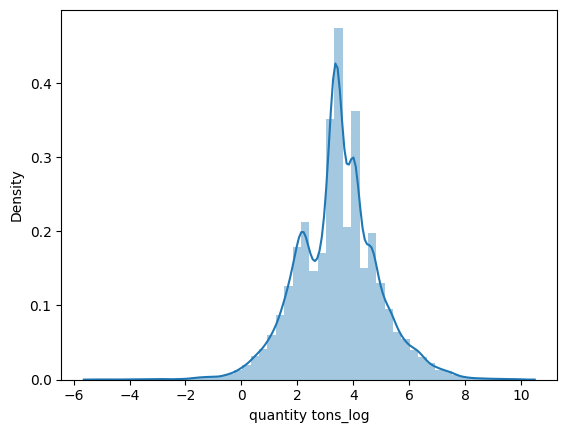

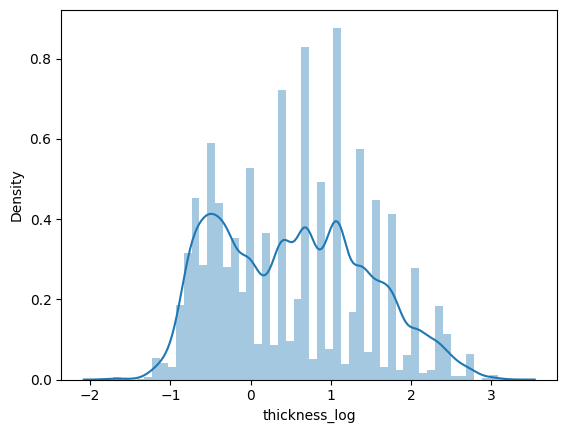

In [49]:
import numpy as np
df['selling_price_log'] = np.log(df['selling_price'])
sns.distplot(df['selling_price_log'])
plt.show()

df['quantity tons_log'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons_log'])
plt.show()

df['thickness_log'] = np.log(df['thickness'])
sns.distplot(df['thickness_log'])
plt.show()


In [50]:
Continues=['quantity tons_log','customer','country','application','thickness_log','width','selling_price_log','thickness_sqrt','quantity tons_sqrt','selling_price_sqrt']
for i in Continues:
    print(i,"--",df[i].skew())

quantity tons_log -- -0.03494778201969608
customer -- 0.6962347787507827
country -- 0.895268443258536
application -- 0.6313114298203799
thickness_log -- 0.23340343582945072
width -- 0.557671377407409
selling_price_log -- -5.077622253480565
thickness_sqrt -- 1.1138385082589608
quantity tons_sqrt -- 5.510860034044365
selling_price_sqrt -- 157.27171789813394


In [51]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_sqrt,quantity tons_sqrt,thickness_sqrt,selling_price_log,quantity tons_log,thickness_log
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,29.223278,7.358746,1.414214,6.749931,3.991779,0.693147
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.00,32.357379,27.713261,0.894427,6.953684,6.643822,-0.223144
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,25.383656,19.650139,0.616441,6.468211,5.956169,-0.967584
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00,27.712813,14.227124,1.516575,6.643790,5.310301,0.832909
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00,24.020824,28.027241,2.000000,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25238,2021-03-04,37.834678,30200964,25,Not lost for AM,W,41,0.45,1320.0,S01P.1037,6.119930e+05,2021-04-01,1232.55,35.107691,6.150990,0.670820,7.116840,3.633226,-0.798508
25239,2021-03-04,7.760847,30200854,25,Won,W,41,2.00,1345.0,0000000000000000000000000000000001006130,1.641416e+08,2021-04-01,930.00,30.495901,2.785830,1.414214,6.835185,2.049092,0.693147
25240,2021-03-04,40.193434,30200964,25,Not lost for AM,W,41,0.45,1420.0,S01X.0588,6.119930e+05,2021-04-01,1536.02,39.192091,6.339829,0.670820,7.336950,3.693704,-0.798508
25241,2021-03-04,6.741159,30200854,25,Won,W,41,0.71,1240.0,0000000000000000000000000000000001003637,6.119930e+05,2021-04-01,1154.00,33.970576,2.596374,0.842615,7.050989,1.908232,-0.342490


In [52]:
df.drop(columns=['selling_price_sqrt','quantity tons_sqrt','thickness_sqrt'],inplace=True)

In [53]:
material_null=df['material_ref'].str.startswith("000000")
replace_null=(material_null==True)
df['material_ref'][replace_null]=np.NaN

In [54]:
df['material_ref'].isnull().sum()

3056

In [55]:
df['material_ref'].fillna(df['material_ref'].mode()[0],inplace=True)
df['material_ref'].isnull().sum()

0

In [56]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,unknown,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00,6.643790,5.310301,0.832909
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25238,2021-03-04,37.834678,30200964,25,Not lost for AM,W,41,0.45,1320.0,S01P.1037,6.119930e+05,2021-04-01,1232.55,7.116840,3.633226,-0.798508
25239,2021-03-04,7.760847,30200854,25,Won,W,41,2.00,1345.0,unknown,1.641416e+08,2021-04-01,930.00,6.835185,2.049092,0.693147
25240,2021-03-04,40.193434,30200964,25,Not lost for AM,W,41,0.45,1420.0,S01X.0588,6.119930e+05,2021-04-01,1536.02,7.336950,3.693704,-0.798508
25241,2021-03-04,6.741159,30200854,25,Won,W,41,0.71,1240.0,unknown,6.119930e+05,2021-04-01,1154.00,7.050989,1.908232,-0.342490


In [57]:
#df[['quantity tons','selling_price']].plot.scatter(x='quantity tons',y='selling_price')
#df[['quantity tons','selling_price']].corr()


In [58]:
#df[['quantity tons_log','selling_price_log']].plot.scatter(x='quantity tons_log',y='selling_price_log')
#df[['quantity tons_log','selling_price_log']].corr()

In [59]:
#df[['thickness','selling_price']].plot.scatter(x='thickness',y='selling_price')
#df[['thickness','selling_price']].corr()

In [60]:

#df[['thickness_log','selling_price_log']].plot.scatter(x='thickness_log',y='selling_price_log')
#df[['thickness_log','selling_price_log']].corr()
#df[['thickness_log','selling_price_log']].plot.scatter(x='thickness_log',y='selling_price_log')
#df[['thickness_log','selling_price_log']].corr()

<Axes: xlabel='item type'>

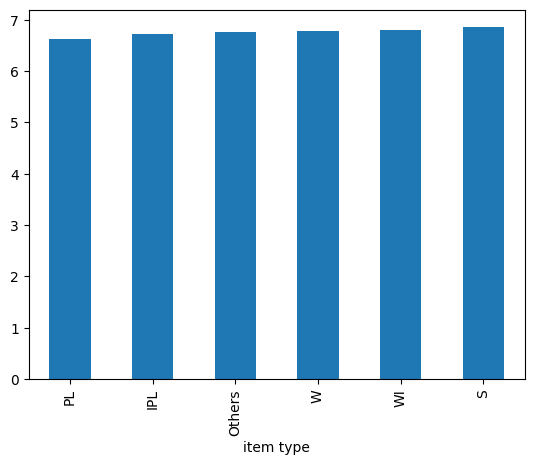

In [61]:
df.groupby('item type')['selling_price_log'].mean().sort_values().plot(kind='bar')


<Axes: xlabel='status'>

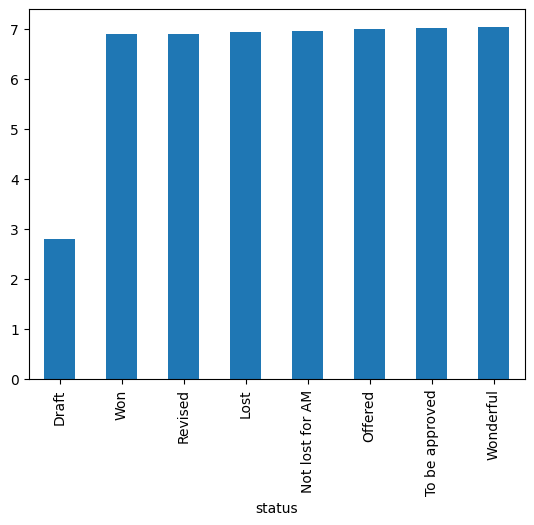

In [62]:
df.groupby('status')['selling_price_log'].mean().sort_values().plot(kind='bar')

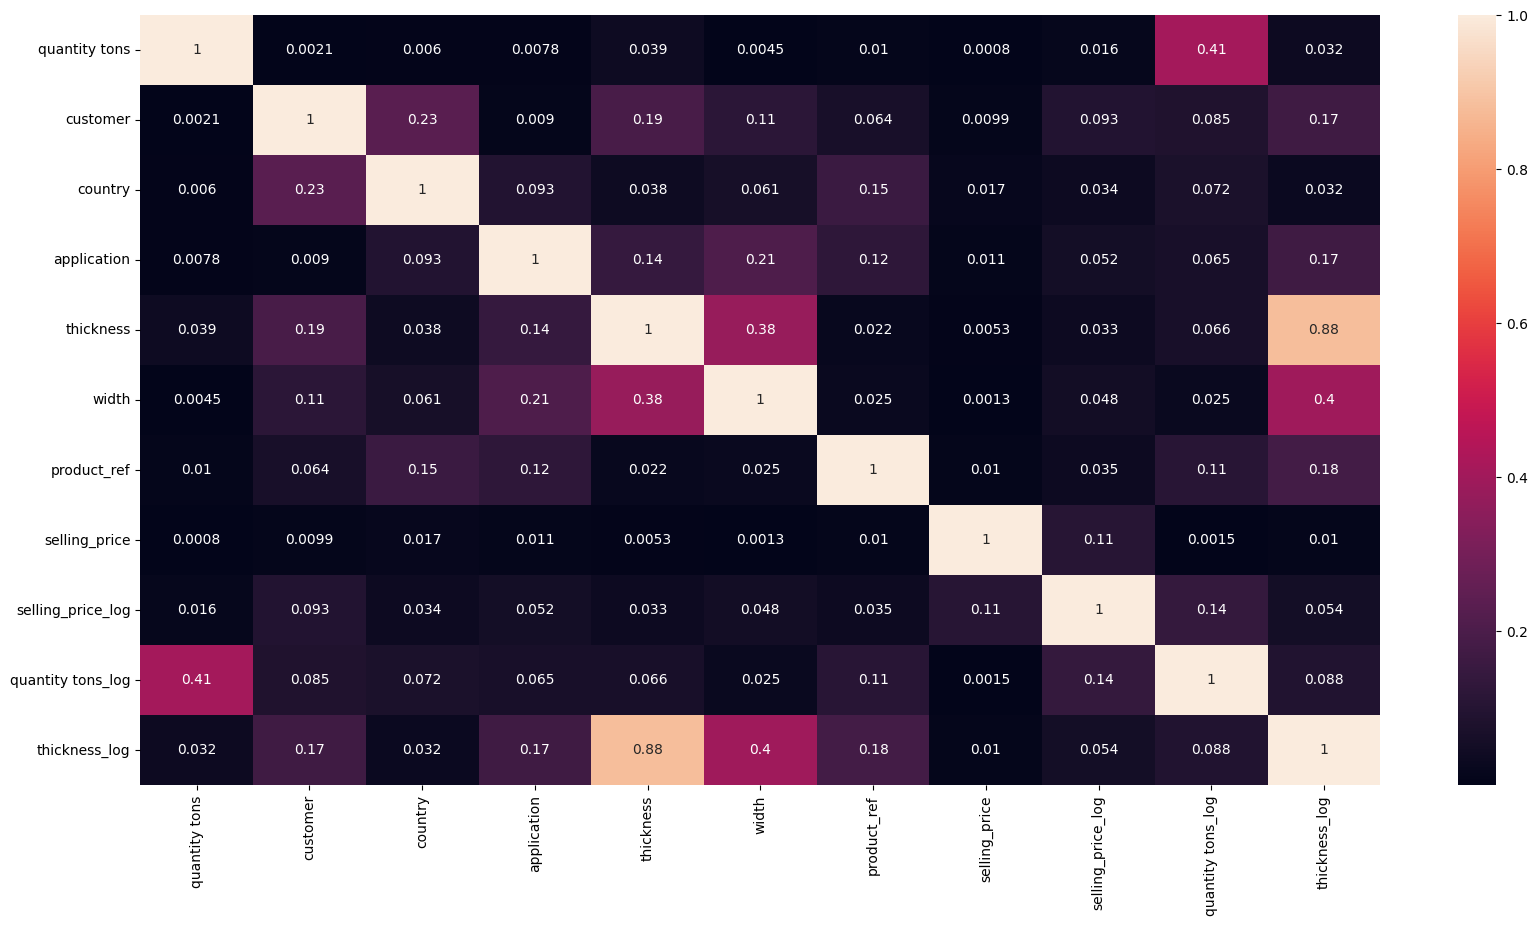

In [63]:
# Select only numeric columns from your DataFrame
numeric_data = df.select_dtypes(include=[np.number])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_data.corr().abs()
#if this code not working add [255] code top of this code
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<Axes: >

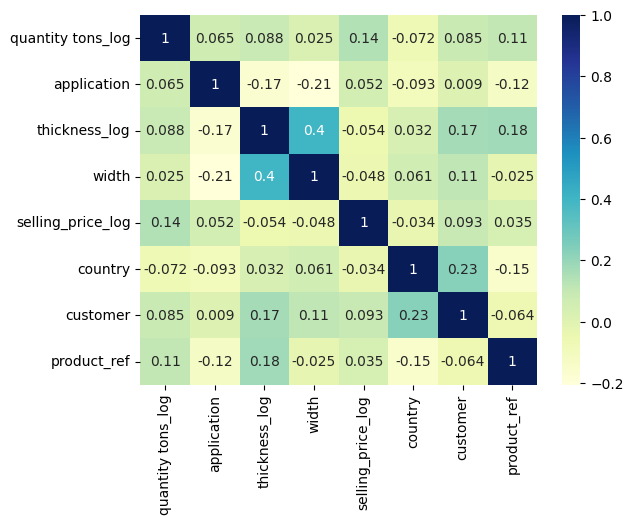

In [64]:
x=df[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [65]:
unique_item_types = df['item type'].unique()

print(unique_item_types)

['W' 'WI' 'S' 'Others' 'PL' 'IPL']


In [66]:
unique_status = df['status'].unique()

print(unique_status)

['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered']


In [67]:
# encoding categorical variables
a = OneHotEncoder(handle_unknown='ignore')
a.fit(df[['item type']])
a1= a.fit_transform(df[['item type']]).toarray()
b = OneHotEncoder(handle_unknown='ignore')
b.fit(df[['status']])
b2 = b.fit_transform(df[['status']]).toarray()

In [68]:
a1

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [69]:
X=df[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df['selling_price_log']

In [70]:
# independent features after encoding
import numpy as np
X= np.concatenate((df[['quantity tons_log',
                       'application',
                       'thickness_log',
                       'width','country',
                       'customer',
                       'product_ref']].values, a1, b2), axis=1)

y=df['selling_price_log']




In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [72]:
#from sklearn.preprocessing import StandardScaler()
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Linear regression**

In [73]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.coef_,lr_model.intercept_


(array([-6.34469118e-03,  5.78125163e-03, -9.71591610e-02, -1.11935571e-04,
        -1.43013646e-02,  1.57013693e-02,  4.65615643e-03,  1.48796301e+10,
         3.65175212e+10,  9.34718856e+10,  2.34829476e+11,  2.42274174e+11,
         3.16896495e+10, -1.48640894e+11, -2.94723326e+11, -2.26786866e+11,
        -2.33795058e+10, -1.43920075e+11, -1.44877964e+11, -4.01839407e+11,
        -6.03842366e+09]),
 6.794169076802244)

In [74]:
#r2_score(y_test,lr_model.predict(X_test))

In [75]:
lr_model.score(X_test, y_test)

0.8841569987727911

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9704482559703423
0.8841569987727911


In [77]:
from sklearn.model_selection import cross_val_score
#synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_lr_model=cross_val_score(lr_model,X_train,y_train,cv=10).mean()
cross_val_lr_model

-6.331423029005666e+19

**Decision Tree Regression**

 **Choosing the best of depth Value**

In [78]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.9489525418764867 cross_val_score :  0.9483916593089299
Depth :  2  train Score  :  0.9706830235780469 cross_val_score :  0.9703654464436375
Depth :  3  train Score  :  0.9753352250788285 cross_val_score :  0.9749805063637831
Depth :  4  train Score  :  0.9805122495981682 cross_val_score :  0.9799412543565686
Depth :  5  train Score  :  0.9818938510605583 cross_val_score :  0.981134959604972
Depth :  6  train Score  :  0.9834083847471934 cross_val_score :  0.9823648748578332
Depth :  7  train Score  :  0.9846637860395049 cross_val_score :  0.9831485464765424
Depth :  8  train Score  :  0.9860421229298166 cross_val_score :  0.9838294547937952
Depth :  9  train Score  :  0.9875104226743623 cross_val_score :  0.9842883993805158
Depth :  10  train Score  :  0.9889900852776717 cross_val_score :  0.984689455205562
Depth :  11  train Score  :  0.9904825272680592 cross_val_score :  0.9849889681893265
Depth :  12  train Score  :  0.9919746127097148 cross_val_score :

In [79]:
cross_val_dt_regressor=max(cross_val_dt)
cross_val_dt_regressor

0.9849889681893265

In [112]:
print("The best depth is 11 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 11 and Cross_val_score is: 0.9835485704451272


**Implementing Decision Tree Regression**

In [81]:
dt_regressor=DecisionTreeRegressor(max_depth=17, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=17, random_state=0)

In [82]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9835485704451272

In [83]:
ftImp = list(zip(dt_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
13,0.951294,selling_price_log
6,0.031805,application
0,0.003577,item_date
5,0.003446,item type
2,0.003005,customer
4,0.001874,status
3,0.001716,country
1,0.001094,quantity tons
10,0.000347,product_ref
11,0.000309,delivery date


**Extreme Gradient Boosting Regression**

**Choosing the best Learning Rate**

In [84]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.850862485442174
Learning rate :  0.05 cross_val_score: 0.9864049242926873
Learning rate :  0.08 cross_val_score: 0.9874776579801642
Learning rate :  0.1 cross_val_score: 0.9880189226948524
Learning rate :  0.2 cross_val_score: 0.9893309517401175
Learning rate :  0.25 cross_val_score: 0.9894927269054841
Learning rate :  0.3 cross_val_score: 0.9894784963376814


In [85]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.9894927269054841

In [111]:
print("The best Learning rate is 0.25 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.25 and Cross_val_score is: 0.9894784963376814


**Implementing Extreme Gradient Boosting Regression**

In [87]:
  xgb_regressor= xgb.XGBRegressor(learning_rate =0.3,n_estimators=100) # initialise the model
  xgb_regressor.fit(X_train,y_train) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9894784963376814

**Random Forest Regression**

**Choosing the best depth value**

In [89]:
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.9703568252633351
Depth :  4 cross_val_score :  0.9803033859899124
Depth :  8 cross_val_score :  0.9853114792599994
Depth :  10 cross_val_score :  0.9871563104525816
Depth :  12 cross_val_score :  0.9886223415197483
Depth :  14 cross_val_score :  0.9895483596132542
Depth :  16 cross_val_score :  0.9900699647856739
Depth :  18 cross_val_score :  0.9902962552667107


In [90]:
cross_val_rf_regressor=max(cross_val_rf)
cross_val_rf_regressor

0.9902962552667107

In [91]:
print("The best depth is 18 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 18 and Cross_val_score is: 0.9902962552667107


**Implementing Random Forest Regression**

In [92]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=0)

In [93]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=10).mean()
cross_val_rf_regressor

0.9902962552667107

** R2 Score for Machine-Learning Models**

In [94]:
from sklearn.metrics import r2_score
y_pred_lr=lr_model.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [95]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [96]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.8841569987727911
R2 Score for Decision Tree Regression Model:  0.8910852489471085
R2 Score for Random Forest Regression Model:  0.8991984997911723
R2 Score for Extreme-Gradient Boosting Regression Model:  0.8972569871154387


**Cross-Validation Score for Machine-Learning Models**

In [141]:
print("Cross Validation Score for Linear Regression Model:",cross_val_lr_model)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: -6.331423029005666e+19
Cross Validation Score for Decision Tree Regression Model:  0.9835485704451272
Cross Validation Score for Random Forest Regression Model:  0.9902962552667107
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.6723186015688518


**Classification**

In [98]:
df.status.value_counts()

Won                18521
Lost                3027
Not lost for AM     1674
Draft                698
Revised              652
To be approved       649
Offered               17
Wonderful              1
Name: status, dtype: int64

In [99]:
df1 = df.copy()

In [101]:
df1 = df[df['status'].isin(['Won', 'Lost'])]
len(df1)

21548

In [102]:
df1.status.value_counts()

Won     18521
Lost     3027
Name: status, dtype: int64

In [103]:
#use ordinal encoder to convert categorical data into numerical data
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df1.status = OE.fit_transform(df1[['status']])
df1['item type'] = OE.fit_transform(df1[['item type']])

In [104]:
X = df1[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = df1['status']

In [105]:
#split data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15083, 9)
(6465, 9)
(15083,)
(6465,)


In [106]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [107]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.8785387522376185
0.8708430007733952


In [108]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9496121461247763
0.9254447022428461


In [109]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8886163230126632
0.8836813611755607


In [110]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8929258105151495
0.8875483372003093


**DecisionTreeClassifier**

 **Choosing the best of depth Value**

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

max_depth = np.arange(1, 20)
cross_val_dt = []

for d in max_depth:
    dt_Classifier = DecisionTreeClassifier(max_depth=d, random_state=0)
    dt_Classifier.fit(X_train, y_train)
    train_score = dt_Classifier.score(X_train, y_train)
    cross_val_mean = cross_val_score(dt_Classifier, X_train, y_train, cv=10).mean()
    print("Depth:", d, "Train Score:", train_score, "Cross-Validation Score:", cross_val_mean)
    cross_val_dt.append(cross_val_mean)

Depth: 1 Train Score: 0.861831200689518 Cross-Validation Score: 0.8618312670396717
Depth: 2 Train Score: 0.8628919976132069 Cross-Validation Score: 0.862891967382267
Depth: 3 Train Score: 0.8642842935755486 Cross-Validation Score: 0.8639526677248621
Depth: 4 Train Score: 0.8775442551216601 Cross-Validation Score: 0.8771464932772947
Depth: 5 Train Score: 0.8785387522376185 Cross-Validation Score: 0.8771461417173354
Depth: 6 Train Score: 0.8850361333952131 Cross-Validation Score: 0.8811905753806076
Depth: 7 Train Score: 0.8974341974408274 Cross-Validation Score: 0.8856320520730613
Depth: 8 Train Score: 0.9106278591792084 Cross-Validation Score: 0.8951124816090195
Depth: 9 Train Score: 0.9228933236093615 Cross-Validation Score: 0.901014514152925
Depth: 10 Train Score: 0.934363190346748 Cross-Validation Score: 0.9118211157458431
Depth: 11 Train Score: 0.9419213684280315 Cross-Validation Score: 0.915666610417073
Depth: 12 Train Score: 0.9497447457402374 Cross-Validation Score: 0.91884972217

In [115]:
cross_val_dt_Classifier=max(cross_val_dt)
cross_val_dt_Classifier

0.9364855078195724

In [117]:
print("The best depth is 18 and Cross_val_score is:",cross_val_dt_Classifier)

The best depth is 18 and Cross_val_score is: 0.9364855078195724


**Implementing Decision Tree Classifier**

In [119]:
dt_Classifier=DecisionTreeClassifier(max_depth=18, random_state=0)
dt_Classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=18, random_state=0)

In [146]:
dtc = DecisionTreeClassifier(max_depth = 18, random_state = 0)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.9936187492748578
0.9447795823665893


**Random Forest Classifier**

 **Choosing the best of depth Value**

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_Classifier=RandomForestClassifier(max_depth=d, random_state=0)
  rf_Classifier.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_Classifier,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_Classifier,X_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.8618312670396717
Depth :  4 cross_val_score :  0.8618312670396717
Depth :  8 cross_val_score :  0.9080420659069455
Depth :  10 cross_val_score :  0.9254786488847639
Depth :  12 cross_val_score :  0.940064783711524
Depth :  14 cross_val_score :  0.9496126248697031
Depth :  16 cross_val_score :  0.9536571024779702
Depth :  18 cross_val_score :  0.9557785031631608


In [129]:
# Find the maximum cross-validation score and its corresponding depth
max_cross_val_score = max(cross_val_rf)
best_depth = max_depth[cross_val_rf.index(max_cross_val_score)]

print("Best Depth:", best_depth)
print("Max Cross-Validation Score:", max_cross_val_score)


Best Depth: 18
Max Cross-Validation Score: 0.9557785031631608


**Implementing RandomForestClassifier**

In [135]:
rf_regressor=RandomForestClassifier(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, random_state=0)

In [147]:
rfc = RandomForestClassifier( max_depth =18,random_state = 0)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9993618749274857
0.9635730858468677


**Extreme Gradient Boosting Regression**

**Choosing the best Learning Rate**

In [131]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.3308985204105687
Learning rate :  0.05 cross_val_score: 0.5361061577960925
Learning rate :  0.08 cross_val_score: 0.5801672820199546
Learning rate :  0.1 cross_val_score: 0.6019478149337469
Learning rate :  0.2 cross_val_score: 0.6520632484932977
Learning rate :  0.25 cross_val_score: 0.6685712795731044
Learning rate :  0.3 cross_val_score: 0.6723186015688518


In [132]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.6723186015688518

In [133]:
print("The best Learning rate is 0.25 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.25 and Cross_val_score is: 0.6723186015688518


**Implementing Extreme Gradient Boosting Regression**

In [134]:
  xgb_regressor= xgb.XGBRegressor(learning_rate =0.3,n_estimators=100) # initialise the model
  xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [148]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.25,random_state = 0)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.9293421510616081
0.9197215777262181


In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[ 474,  107],
       [ 117, 3612]])

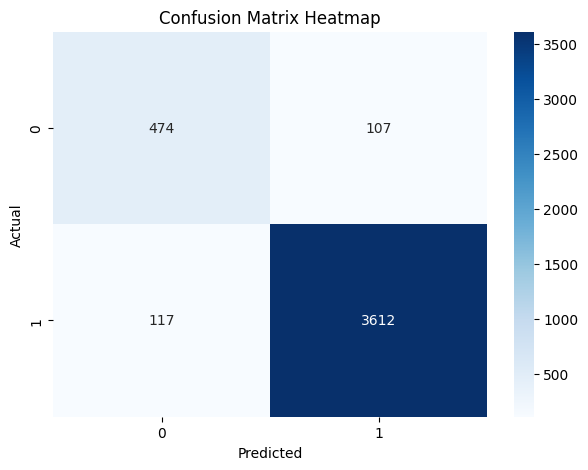

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a confusion matrix stored in 'cm'
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [155]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [156]:
#check accuracy score.
accuracy_score(y_test, y_pred)

0.9480278422273782

In [157]:
f1_score(y_test,y_pred, average = 'macro')

0.889399266083297

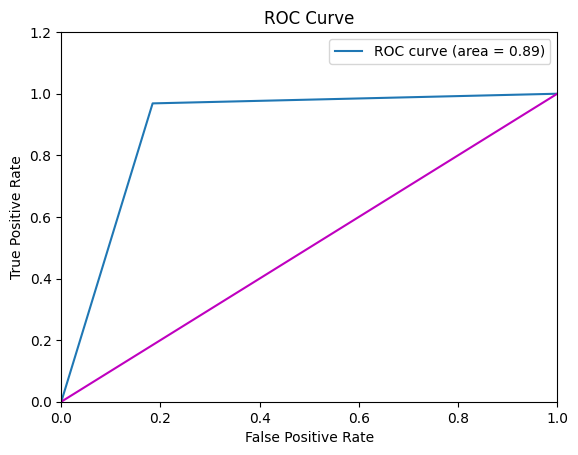

In [159]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       581
         1.0       0.97      0.97      0.97      3729

    accuracy                           0.95      4310
   macro avg       0.89      0.89      0.89      4310
weighted avg       0.95      0.95      0.95      4310

